<a href="https://colab.research.google.com/github/JoanHTey/TFG/blob/main/IPR_images_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def build_supra_adjacency_matrix(A_1, A_2, p, gamma):
    n = A_1.shape[0]

    # Create the off-diagonal blocks
    identity_block = np.eye(n)
    off_diagonal_block1 = p * identity_block
    off_diagonal_block2 = p * identity_block

    # Construct the final 2Nx2N matrix
    top_row = np.hstack((A_1, off_diagonal_block1))
    bottom_row = np.hstack((off_diagonal_block2, A_2))
    result_matrix = np.vstack((top_row, bottom_row))

    return result_matrix

In [7]:
def build_supra_contact_matrix(A_1, A_2, p, gamma):
    n = A_1.shape[0]

    # Calculate row sums
    k_1 = np.sum(A_1, axis=1)
    k_2 = np.sum(A_2, axis=1)
    #print(k_1)
    #print(k_2)

    # Calculate diagonal blocks
    R_1 = 1 - np.power(1 - A_1 / k_1[:, np.newaxis], gamma)
    R_2 = 1 - np.power(1 - A_2 / k_2[:, np.newaxis], gamma)

    # Create the off-diagonal blocks
    identity_block = np.eye(n)
    off_diagonal_block1 = p * identity_block
    off_diagonal_block2 = p * identity_block

    # Construct the final 2Nx2N matrix
    top_row = np.hstack((R_1, off_diagonal_block1))
    bottom_row = np.hstack((off_diagonal_block2, R_2))
    result_matrix = np.vstack((top_row, bottom_row))

    return result_matrix

In [8]:
def leading_eigenvector(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Find the index of the leading eigenvalue
    leading_index = np.argmax(eigenvalues)

    # Extract the leading eigenvector
    leading_eigenvector = eigenvectors[:, leading_index]

    return leading_eigenvector, eigenvalues[leading_index]

In [9]:
def IPR(vector):
    N = len(vector) // 2
    IPR1 = sum(entry ** 4 for entry in vector[:N])
    IPR2 = sum(entry ** 4 for entry in vector[N:])
    return IPR1, IPR2

Generation of $IPR(p)$ for different $\gamma$



In [ ]:
#Generate the graphs
G1=nx.random_regular_graph(30,100)
G2=nx.random_regular_graph(10,100)
while nx.is_connected(G1)!=True:
  G1=nx.random_regular_graph(30,100)
while nx.is_connected(G2)!=True:
  G2=nx.random_regular_graph(10,100)

A_1=nx.to_numpy_array(G1)
A_2=nx.to_numpy_array(G2

In [ ]:

i1l={}
i2l={}
#v1={}

# IPR for diferent gamma calculations
for gamma in np.logspace(0,2,10):
  i1l[gamma]=[]
  i2l[gamma]=[]
  #v1[gamma]=[]
  for p in np.logspace(-2,2,100):
    r = build_supra_contact_matrix(A_1, A_2, p, gamma)
    w,v=leading_eigenvector(r)
    i1,i2=IPR(w)
    #v1[gamma].append(v)
    i1l[gamma].append(i1)
    i2l[gamma].append(i2)

Analitycal demostration:

v2= P/𝚲*v1 i v1=(1,1,...1)/\sqrt{100}

IPR2=∑(v2)^4 = 1/100·(p/𝚲)^4


Text(0, 0.5, 'IPR')

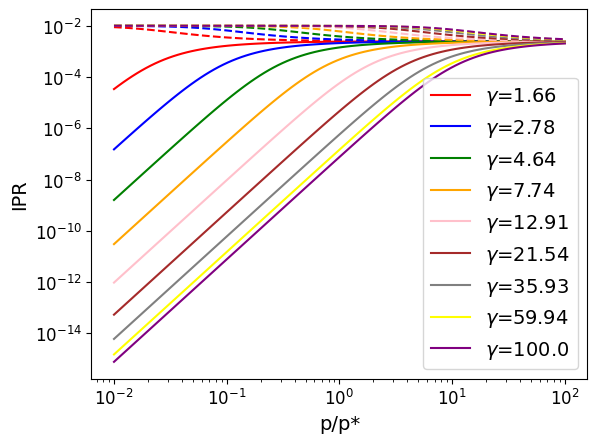

In [ ]:
#PLot IPR
colors=['red','blue','green','orange','pink','brown','gray','yellow','purple','lima']
i=0
for gamma in np.logspace(0,2,10):
  if gamma!=1:
    #plt.plot(np.logspace(-2,2,100)/((10*(1-(1-1/10)**(np.logspace(0,2,10)[i+1]))-8*(1-(1-1/8)**(np.logspace(0,2,10)[i+1])))),i1l[gamma],color=colors[i],linestyle='--' )
    #plt.plot(np.logspace(-2,2,100)/((10*(1-(1-1/10)**(np.logspace(0,2,10)[i+1]))-8*(1-(1-1/8)**(np.logspace(0,2,10)[i+1])))),i2l[gamma],label=r'$\gamma$'+'='+str(int(gamma*100)/100),color=colors[i])
    plt.plot(np.logspace(-2,2,100),i1l[gamma],color=colors[i],linestyle='--' )
    plt.plot(np.logspace(-2,2,100),i2l[gamma],label=r'$\gamma$'+'='+str(int(gamma*100)/100),color=colors[i])
    #plt.plot(np.logspace(-5,2,100),i2l[gamma],label=gamma)
    #plt.plot(np.logspace(-5,2,100),1/100*(np.logspace(-5,2,100)/((10*(1-(1-1/10)**(np.logspace(0,2,10)[i+1])+1/1.5*np.logspace(-5,2,100)))-8*(1-(1-1/8)**(np.logspace(0,2,10)[i+1])+1/1.5*np.logspace(-5,2,100))))**4,label=gamma+1)


    i=i+1
plt.rcParams['font.size'] = 14
plt.yscale('log')
plt.xscale('log')
plt.legend(loc="lower right")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("p/p*",fontsize=14)
plt.ylabel("IPR",fontsize=14)


#plt.show()

Characteritzation of the non-dominant layer in the localizated regime.

In [ ]:
# Generate graphs
G1=nx.random_regular_graph(10,100)
G2=nx.random_regular_graph(8,100)
while nx.is_connected(G1)!=True:
  G1=nx.random_regular_graph(10,100)
while nx.is_connected(G2)!=True:
  G2=nx.random_regular_graph(8,100)

A_1=nx.to_numpy_array(G1)
A_2=nx.to_numpy_array(G2)

In [ ]:

i1l={}
i2l={}
#v1={}

#Calculate IPR
for gamma in np.logspace(0,2,20):
  i1l[gamma]=[]
  i2l[gamma]=[]
  #v1[gamma]=[]
  for p in np.logspace(-5,2,100):
    r = build_supra_contact_matrix(A_1, A_2, p, gamma)
    w,v=leading_eigenvector(r)
    i1,i2=IPR(w)
    #v1[gamma].append(v)
    i1l[gamma].append(i1)
    i2l[gamma].append(i2)

In [ ]:
alpha=[]
c1=[]
c2=[]


for gamma in np.logspace(0,2,20):

    #Linear regression of the log(IPR(v2)) in function of log(p)
    c,m=np.polyfit(np.log(np.logspace(-5,2,100))[:10],np.log(i2l[gamma])[:10],1)
    cf=i2l[gamma][99]

    alpha.append(c)
    c1.append(m)
    c2.append(cf)
print(c1,c2)

[-5.991464550700521, 16.895956970848687, 12.753125204280304, 9.768565736484417, 7.273190618048031, 5.064263368368907, 3.059316857574853, 1.222804566432797, -0.45746283120490744, -1.979911367205732, -3.3340983168311302, -4.5042416133689365, -5.473086263599151, -6.227248487358425, -6.764509657181252, -7.101749847118661, -7.278831855129632, -7.351552351678625, -7.373075542286687, -7.377253065237253] [0.0025000000000000035, 0.002499884363400027, 0.0024996739948220047, 0.0024993124714806866, 0.0024987170654364945, 0.0024977715817307206, 0.0024963219419473427, 0.0024941800096618246, 0.0024911443071131507, 0.0024870478739338355, 0.0024818389329975825, 0.0024756826248567574, 0.002469039104506892, 0.002462639644960039, 0.0024572924586437612, 0.0024535535590126407, 0.0024514616554822213, 0.0024505756837189512, 0.0024503103893938148, 0.0024502587334384184]


In [ ]:
#Obtaining p*
Pc=[]

for i in range(1,20):
  Pc.append((c2[i]/np.exp(c1[i]))**(1/alpha[i]))

print(Pc)



[0.0032721346271790564, 0.009221422442319917, 0.019446561403129226, 0.03628705487562179, 0.06302930514320822, 0.1040312856041383, 0.16461431743082797, 0.2504771478407844, 0.36634239384287975, 0.5136751100576409, 0.687805368594611, 0.8757190209126771, 1.0567326609222565, 1.2079849295957608, 1.3137465190942186, 1.372920543376709, 1.397982339076674, 1.4054868320196123, 1.4069480469588276]


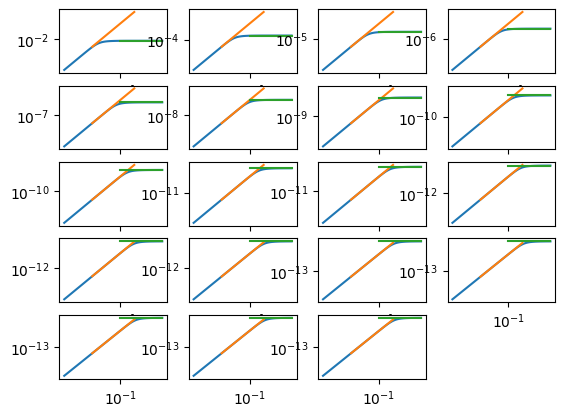

In [ ]:

#Plot the diferent polyfit to see if they are correct
i=0
x=np.linspace(0.001,1,100)
plt.figure()
for gamma in np.logspace(0,2,20):
    if gamma!=1:
        i=i+1
        plt.subplot2grid(( 5,4) ,(((i-1)//4), (((i-1)-4*((i-1)//4)))))
        plt.plot(np.logspace(-5,2,100),i2l[gamma],label=gamma)
        plt.plot(x[:i*100],(x[:i*100])**(alpha[i])*np.exp(c1[i]))
        plt.plot(np.logspace(-1,2,2),[c2[i],c2[i]])
        #plt.plot([Pc[i-1],Pc[i-1]],np.logspace(-3,-2,2))
        #plt.axis(False)
        plt.yscale('log')
        plt.xscale('log')

plt.show()

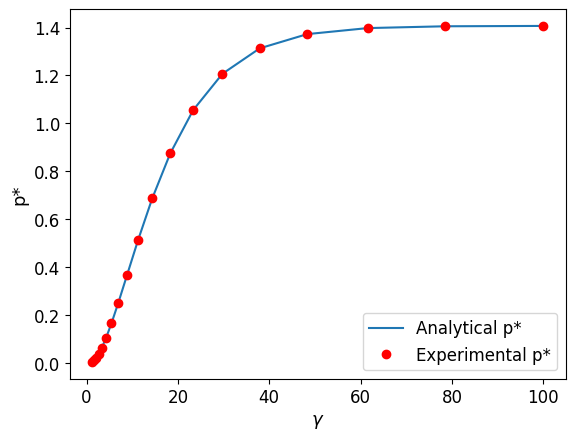

In [ ]:
#Plot of p* in function of gamma


plt.plot((np.logspace(0,2,20)[1:]),pend[0]*(10*(1-(1-1/10)**(np.logspace(0,2,20)[1:]))-8*(1-(1-1/8)**(np.logspace(0,2,20)[1:]))),label='Analytical p*')
plt.plot(np.logspace(0,2,20)[1:],Pc[:],marker='o',linestyle=' ',label='Experimental p*',color='red')
plt.xlabel(r'$\gamma$',fontsize=13)
plt.ylabel("p*",fontsize=13)
plt.legend(loc="lower right",fontsize=12)
#plt.yscale('log')
#plt.xscale('log')
plt.show()


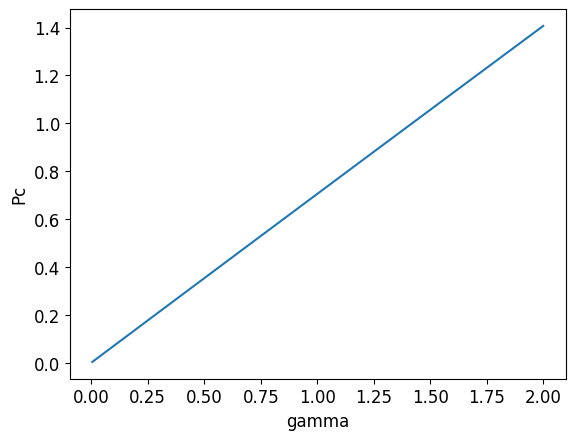

0.7035565373366455 0.0006476324032573445


In [ ]:
# Plot experimental P* as a function of analytical P*
plt.plot((10*(1-(1-1/10)**(np.logspace(0,2,20)[1:]))-8*(1-(1-1/8)**(np.logspace(0,2,20)[1:]))),Pc[:])
plt.xlabel("gamma")
plt.ylabel("Pc")
#plt.yscale('log')
#plt.xscale('log')
plt.show()


constant=[]
pend=[]



#Linear regression of the experimental p* in function of anaytical p*
c,m=np.polyfit((10*(1-(1-1/10)**(np.logspace(0,2,20)[1:]))-8*(1-(1-1/8)**(np.logspace(0,2,20)[1:]))),Pc[:],1)
pend.append(c)
constant.append(m)
print(c,m)

Diferents gamma for each layer analysis

In [4]:
def build_diferent_gammas_matrix(A_1, A_2, p, gamma1,gamma2):
    n = A_1.shape[0]

    #matrix 1
    if gamma1=="inf":
      R_1=A_1
    else:
      # Calculate row sums
      k_1 = np.sum(A_1, axis=1)
      # Calculate diagonal blocks
      R_1 = 1 - np.power(1 - A_1 / k_1[:, np.newaxis], gamma1)

    if gamma2=="inf":
      R_2=A_2
    else:
      # Calculate row sums
      k_2 = np.sum(A_2, axis=1)
      # Calculate diagonal blocks
      R_2 = 1 - np.power(1 - A_2 / k_2[:, np.newaxis], gamma2)


    # Create the off-diagonal blocks
    identity_block = np.eye(n)
    off_diagonal_block1 = p * identity_block
    off_diagonal_block2 = p * identity_block

    # Construct the final 2Nx2N matrix
    top_row = np.hstack((R_1, off_diagonal_block1))
    bottom_row = np.hstack((off_diagonal_block2, R_2))
    result_matrix = np.vstack((top_row, bottom_row))

    return result_matrix

In [ ]:

#Matrix generation

#Random regular
G1=nx.random_regular_graph(10,1000)
G2=nx.random_regular_graph(30,1000)
while nx.is_connected(G1)!=True:
  G1=nx.random_regular_graph(10,1000)
while nx.is_connected(G2)!=True:
  G2=nx.random_regular_graph(30,1000)

A_1=nx.to_numpy_array(G1)
A_2=nx.to_numpy_array(G2)

dif_gamma_1=np.zeros(20)
dif_gamma_2=np.zeros(20)

k1=10
k2=30

N=1000

#Erdo renyi
G1_2=nx.erdos_renyi_graph(N,k1/N)
G2_2=nx.erdos_renyi_graph(N,k2/N)
while nx.is_connected(G1_2)!=True:
    G1_2=nx.erdos_renyi_graph(N,k1/N)
while nx.is_connected(G2_2)!=True:
    G2_2=nx.erdos_renyi_graph(N,k2/N)

A_1_2=nx.to_numpy_array(G1_2)
A_2_2=nx.to_numpy_array(G2_2)

dif_gamma_1_2=np.zeros(20)
dif_gamma_2_2=np.zeros(20)

n=A_1.shape[0]
i=0
p=0.1

#Diferent gamma eigenvalues calculation for Random Regular
for gamma2 in np.logspace(0,3,20):
  r = build_diferent_gammas_matrix(A_1, A_2, p, "inf",gamma2)
  w1,v1=leading_eigenvector(r[:n,:n])
  w2,v2=leading_eigenvector(r[n:,n:])
  dif_gamma_1[i]=v1
  dif_gamma_2[i]=v2
  i=i+1

#Eigenvalue calculations for diferent gammas for Erdo Renyi
i=0
for gamma2 in np.logspace(0,3,20):
  r = build_diferent_gammas_matrix(A_1_2, A_2_2, p, "inf",gamma2)
  w1,v1=leading_eigenvector(r[:n,:n])
  w2,v2=leading_eigenvector(r[n:,n:])
  dif_gamma_1_2[i]=v1
  dif_gamma_2_2[i]=v2
  i=i+1




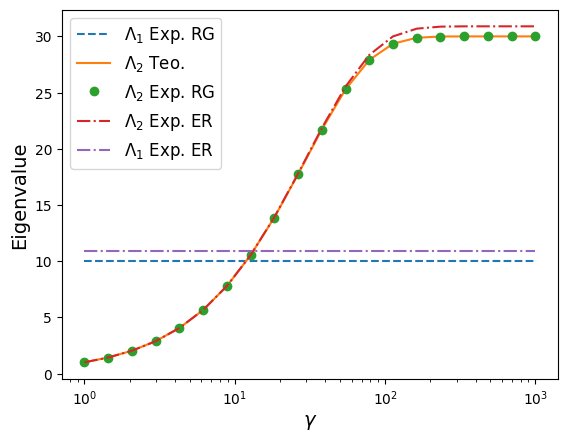

[10.9400324 10.9400324 10.9400324 10.9400324 10.9400324 10.9400324
 10.9400324 10.9400324 10.9400324 10.9400324 10.9400324 10.9400324
 10.9400324 10.9400324 10.9400324 10.9400324 10.9400324 10.9400324
 10.9400324 10.9400324]


In [ ]:

#Eigenvalue as a function of gamma for different networks

plt.plot(np.logspace(0,3,20)[:],dif_gamma_1[:],label=r'$\Lambda_1$'+' Exp. '+'RG',linestyle='--' )
plt.plot(np.logspace(0,3,20)[:],30*(1-(1-1/30)**np.logspace(0,3,20)[:]),label=r'$\Lambda_2$'+' Teo.')
plt.plot(np.logspace(0,3,20)[:],dif_gamma_2[:],label=r'$\Lambda_2$'+' Exp. '+'RG',marker='o',linestyle=' ')

plt.plot(np.logspace(0,3,20)[:],dif_gamma_2_2[:],label=r'$\Lambda_2 $'+' Exp. '+'ER',linestyle='-.')
plt.plot(np.logspace(0,3,20)[:],dif_gamma_1_2[:],label=r'$\Lambda_1 $'+' Exp. '+'ER',linestyle='-.' )
#plt.yscale('log')
plt.xscale('log')
plt.legend(loc="upper left",fontsize=12)
plt.xlabel(r'$\gamma$',fontsize=14)
plt.ylabel("Eigenvalue",fontsize=14)

plt.show()
print(dif_gamma_1_2[:])

In [10]:
#Diferentes gammas IPR

#Matrix generation
G1=nx.random_regular_graph(10,100)
G2=nx.random_regular_graph(12,100)
while nx.is_connected(G1)!=True:
  G1=nx.random_regular_graph(10,100)
while nx.is_connected(G2)!=True:
  G2=nx.random_regular_graph(12,100)



A_1=nx.to_numpy_array(G1)
A_2=nx.to_numpy_array(G2)


i1_2l={}
i2_2l={}
#v1={}

#Calculating IPR for diferent gamma2
for gamma2 in np.linspace(1,25,11):


  i1_2l[gamma2]=[]
  i2_2l[gamma2]=[]

  for p in np.logspace(-2,2,100):
    r = build_diferent_gammas_matrix(A_1, A_2, p, "inf",gamma2)
    w,v=leading_eigenvector(r)
    i1,i2=IPR(w)
    i1_2l[gamma2].append(i1)
    i2_2l[gamma2].append(i2)


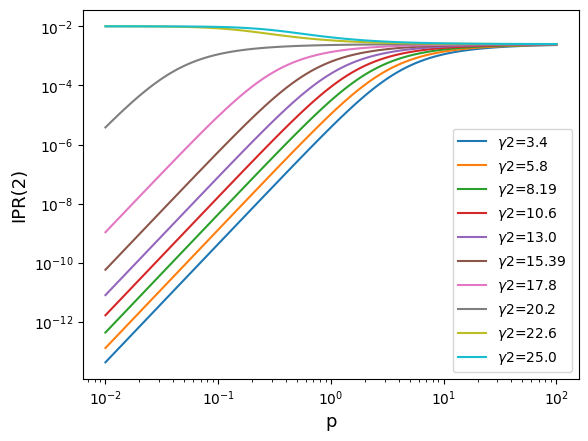

In [11]:
# Plotting IPR_2 as a ufnction of p
i=0
for gamma2 in np.linspace(1,25,11):
  if gamma2!=1:
    #plt.plot(np.logspace(-2,2,100),i1_2l[gamma],label=gamma)
    plt.plot(np.logspace(-2,2,100),i2_2l[gamma2],label=r'$\gamma2$'+'='+str(int(gamma2*100)/100))
    i=i+1
plt.yscale('log')
plt.xscale('log')
plt.legend(loc="lower right")
plt.xlabel("p",fontsize=13)
plt.ylabel("IPR(2)",fontsize=13)

plt.show()

In [ ]:
#Diferentes gammas IPR

#Matrix generation
G1=nx.random_regular_graph(10,100)
G2=nx.random_regular_graph(12,100)
while nx.is_connected(G1)!=True:
  G1=nx.random_regular_graph(10,100)
while nx.is_connected(G2)!=True:
  G2=nx.random_regular_graph(12,100)

A_1=nx.to_numpy_array(G1)
A_2=nx.to_numpy_array(G2)


i1_2ll=np.zeros(300)
i2_2ll=np.zeros(300)
#v1={}
i=0
p=0.1

#IPR calculation for diferent gamma
for gamma2 in np.logspace(0,2,300):
    r = build_diferent_gammas_matrix(A_1, A_2, p, "inf",gamma2)
    w,v=leading_eigenvector(r)
    i1,i2=IPR(w)
    i1_2ll[i]=i1
    i2_2ll[i]=i2
    i=i+1

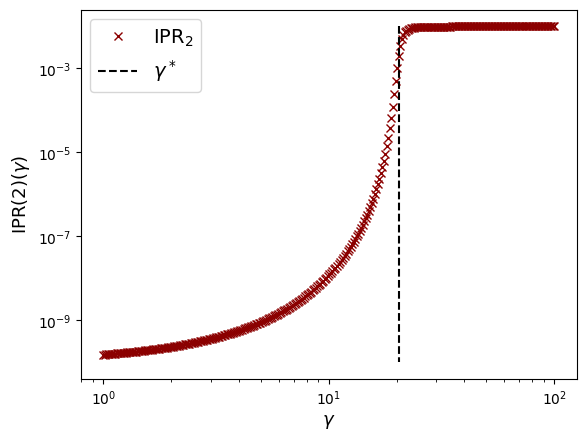

In [ ]:
y=[10**(-2),10**(-10)]
x=[20.59,20.59]

plt.plot(np.logspace(0,2,300),i2_2ll,marker='x',color='darkred',linestyle=' ',label='IPR'+r'$_2$')
plt.plot(x,y,color='black',linestyle='--',label=r'$\gamma^*$')
plt.yscale('log')
plt.xscale('log')

plt.legend(fontsize=14)
plt.xlabel(r'$\gamma$',fontsize=13)
plt.ylabel("IPR(2)("r'$\gamma$'")",fontsize=13)

plt.show()